In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Delimitando as colunas a serem analizadas.
cols = ['ID_REGIAO' ,'ID_UF' ,'ID_MUNICIPIO' ,'ID_TURNO' , 
 'IN_SITUACAO_CENSO','IN_PREENCHIMENTO_MT','PROFICIENCIA_MT_SAEB',
 'IN_PREENCHIMENTO_QUESTIONARIO', 'TX_RESP_Q001' ,'TX_RESP_Q002',
 'TX_RESP_Q003A' ,'TX_RESP_Q003B' ,'TX_RESP_Q003C', 'TX_RESP_Q003D',
 'TX_RESP_Q003E', 'TX_RESP_Q004', 'TX_RESP_Q005' ,'TX_RESP_Q006A',
 'TX_RESP_Q006B', 'TX_RESP_Q006C' ,'TX_RESP_Q006D', 'TX_RESP_Q006E',
 'TX_RESP_Q007' ,'TX_RESP_Q008A', 'TX_RESP_Q008B', 'TX_RESP_Q008C',
 'TX_RESP_Q009A' ,'TX_RESP_Q009B', 'TX_RESP_Q009C' ,'TX_RESP_Q009D',
 'TX_RESP_Q009E' ,'TX_RESP_Q009F' ,'TX_RESP_Q009G' ,'TX_RESP_Q010A',
 'TX_RESP_Q010B' ,'TX_RESP_Q010C', 'TX_RESP_Q010D' ,'TX_RESP_Q010E',
 'TX_RESP_Q010F', 'TX_RESP_Q010G', 'TX_RESP_Q010H', 'TX_RESP_Q010I',
 'TX_RESP_Q011', 'TX_RESP_Q012', 'TX_RESP_Q013' ,'TX_RESP_Q014',
 'TX_RESP_Q015', 'TX_RESP_Q016' ,'TX_RESP_Q017A' ,'TX_RESP_Q017B',
 'TX_RESP_Q017C' ,'TX_RESP_Q017D', 'TX_RESP_Q017E' ,'TX_RESP_Q018A',
 'TX_RESP_Q018B' ,'TX_RESP_Q018C' ,'TX_RESP_Q019']
df = pd.read_csv('TS_ALUNO_9EF.csv', usecols= cols, sep= ',')
df.head()

,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_TURNO,IN_SITUACAO_CENSO,IN_PREENCHIMENTO_MT,PROFICIENCIA_MT_SAEB,IN_PREENCHIMENTO_QUESTIONARIO,TX_RESP_Q001,TX_RESP_Q002,...,TX_RESP_Q016,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019
0,1,11,1100015,1,1,1,239.920418,1,A,A,...,A,D,A,D,B,A,C,B,A,C
1,1,11,1100015,1,1,1,244.042645,1,A,C,...,A,D,A,D,B,A,A,A,A,C
2,1,11,1100015,1,1,1,230.205828,1,A,C,...,A,D,A,D,C,A,C,B,B,D
3,1,11,1100015,1,1,1,268.977498,1,A,C,...,A,C,A,D,C,A,A,A,A,D
4,1,11,1100015,1,1,1,260.803189,1,A,A,...,A,C,A,*,B,A,B,A,A,C


In [3]:
# Selecionando somente os alunos que preencheram a prova de mt.
df = df[(df["IN_PREENCHIMENTO_MT"]==1)&(df['IN_PREENCHIMENTO_QUESTIONARIO']==1)]
df.drop(['IN_PREENCHIMENTO_MT','IN_PREENCHIMENTO_QUESTIONARIO'], axis=1, inplace = True)
df.head()

,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_TURNO,IN_SITUACAO_CENSO,PROFICIENCIA_MT_SAEB,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,...,TX_RESP_Q016,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019
0,1,11,1100015,1,1,239.920418,A,A,B,B,...,A,D,A,D,B,A,C,B,A,C
1,1,11,1100015,1,1,244.042645,A,C,B,A,...,A,D,A,D,B,A,A,A,A,C
2,1,11,1100015,1,1,230.205828,A,C,B,.,...,A,D,A,D,C,A,C,B,B,D
3,1,11,1100015,1,1,268.977498,A,C,B,B,...,A,C,A,D,C,A,A,A,A,D
4,1,11,1100015,1,1,260.803189,A,A,B,B,...,A,C,A,*,B,A,B,A,A,C


In [4]:
# Verificando a quantidade de alunos que preencheram a prova.
df.shape

(1924129, 55)

In [5]:
# Analizando o comportamento das notas.
df['PROFICIENCIA_MT_SAEB'].describe()

count    1.924083e+06
mean     2.572198e+02
std      4.904436e+01
min      1.263265e+02
25%      2.231211e+02
50%      2.589428e+02
75%      2.917224e+02
max      3.974874e+02
Name: PROFICIENCIA_MT_SAEB, dtype: float64

In [6]:
df.dtypes

ID_REGIAO                 int64
ID_UF                     int64
ID_MUNICIPIO              int64
ID_TURNO                  int64
IN_SITUACAO_CENSO         int64
PROFICIENCIA_MT_SAEB    float64
TX_RESP_Q001             object
TX_RESP_Q002             object
TX_RESP_Q003A            object
TX_RESP_Q003B            object
TX_RESP_Q003C            object
TX_RESP_Q003D            object
TX_RESP_Q003E            object
TX_RESP_Q004             object
TX_RESP_Q005             object
TX_RESP_Q006A            object
TX_RESP_Q006B            object
TX_RESP_Q006C            object
TX_RESP_Q006D            object
TX_RESP_Q006E            object
TX_RESP_Q007             object
TX_RESP_Q008A            object
TX_RESP_Q008B            object
TX_RESP_Q008C            object
TX_RESP_Q009A            object
TX_RESP_Q009B            object
TX_RESP_Q009C            object
TX_RESP_Q009D            object
TX_RESP_Q009E            object
TX_RESP_Q009F            object
TX_RESP_Q009G            object
TX_RESP_

In [7]:
df = df.replace("*", np.nan)
df = df.replace(".", np.nan)
df = df.replace(" ", np.nan)

In [8]:
df.isna().sum()

ID_REGIAO                    0
ID_UF                        0
ID_MUNICIPIO                 0
ID_TURNO                     0
IN_SITUACAO_CENSO            0
PROFICIENCIA_MT_SAEB        46
TX_RESP_Q001             61574
TX_RESP_Q002             73412
TX_RESP_Q003A           149785
TX_RESP_Q003B           205046
TX_RESP_Q003C           223606
TX_RESP_Q003D           418212
TX_RESP_Q003E           439103
TX_RESP_Q004             83994
TX_RESP_Q005             71862
TX_RESP_Q006A           110969
TX_RESP_Q006B            94783
TX_RESP_Q006C           115902
TX_RESP_Q006D           118713
TX_RESP_Q006E           109846
TX_RESP_Q007            175816
TX_RESP_Q008A            57777
TX_RESP_Q008B           100268
TX_RESP_Q008C            79422
TX_RESP_Q009A            41932
TX_RESP_Q009B           102556
TX_RESP_Q009C           169618
TX_RESP_Q009D            73677
TX_RESP_Q009E            60267
TX_RESP_Q009F            66865
TX_RESP_Q009G            50235
TX_RESP_Q010A            52487
TX_RESP_

In [9]:
# Tratamento de dados nulos
df.dropna(inplace=True)
df.shape

(871477, 55)

In [10]:
# Separando dados por niveis
escala = [
    (df["PROFICIENCIA_MT_SAEB"] < 200),
    (df["PROFICIENCIA_MT_SAEB"] >= 200) & (df["PROFICIENCIA_MT_SAEB"] < 225),
    (df["PROFICIENCIA_MT_SAEB"] >= 225) & (df["PROFICIENCIA_MT_SAEB"] < 250),
    (df["PROFICIENCIA_MT_SAEB"] >= 250) & (df["PROFICIENCIA_MT_SAEB"] < 275),
    (df["PROFICIENCIA_MT_SAEB"] >= 275) & (df["PROFICIENCIA_MT_SAEB"] < 300),
    (df["PROFICIENCIA_MT_SAEB"] >= 300) & (df["PROFICIENCIA_MT_SAEB"] < 325),
    (df["PROFICIENCIA_MT_SAEB"] >= 325) & (df["PROFICIENCIA_MT_SAEB"] < 350),
    (df["PROFICIENCIA_MT_SAEB"] >= 350) & (df["PROFICIENCIA_MT_SAEB"] < 375),
    (df["PROFICIENCIA_MT_SAEB"] >= 375) & (df["PROFICIENCIA_MT_SAEB"] < 400),
    (df["PROFICIENCIA_MT_SAEB"] >= 400)
    ]
nivel = ["Nivel 0", "Nivel 1", "Nivel 2", "Nivel 3", "Nivel 4", "Nivel 5", "Nivel 6", "Nivel 7", "Nivel 8", "Nivel 9"]
df["ESCALA_MT"] = np.select(escala, nivel)
df.head()

,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_TURNO,IN_SITUACAO_CENSO,PROFICIENCIA_MT_SAEB,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,...,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019,ESCALA_MT
1,1,11,1100015,1,1,244.042645,A,C,B,A,...,D,A,D,B,A,A,A,A,C,Nivel 2
3,1,11,1100015,1,1,268.977498,A,C,B,B,...,C,A,D,C,A,A,A,A,D,Nivel 3
6,1,11,1100015,1,1,248.575792,A,C,B,A,...,D,A,D,B,A,B,A,A,D,Nivel 2
8,1,11,1100015,1,1,284.218609,A,C,B,B,...,D,A,D,B,D,B,A,A,C,Nivel 4
13,1,11,1100015,1,1,266.029122,A,C,B,B,...,B,A,D,B,B,B,B,B,D,Nivel 3


In [11]:
# Separando dados por niveis
escala = [
    (df["PROFICIENCIA_MT_SAEB"] < 200),
    (df["PROFICIENCIA_MT_SAEB"] >= 200) & (df["PROFICIENCIA_MT_SAEB"] < 250),
    (df["PROFICIENCIA_MT_SAEB"] >= 250) & (df["PROFICIENCIA_MT_SAEB"] < 300),
    (df["PROFICIENCIA_MT_SAEB"] >= 300) & (df["PROFICIENCIA_MT_SAEB"] < 350),
    (df["PROFICIENCIA_MT_SAEB"] >= 350) & (df["PROFICIENCIA_MT_SAEB"] < 400),
    (df["PROFICIENCIA_MT_SAEB"] >= 400)
    ]
nivel = ["Nivel 0", "Nivel 1", "Nivel 2", "Nivel 3", "Nivel 4", "Nivel 5"]

df["ESCALA_MT2"] = np.select(escala, nivel)
df.head()

,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_TURNO,IN_SITUACAO_CENSO,PROFICIENCIA_MT_SAEB,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,...,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019,ESCALA_MT,ESCALA_MT2
1,1,11,1100015,1,1,244.042645,A,C,B,A,...,A,D,B,A,A,A,A,C,Nivel 2,Nivel 1
3,1,11,1100015,1,1,268.977498,A,C,B,B,...,A,D,C,A,A,A,A,D,Nivel 3,Nivel 2
6,1,11,1100015,1,1,248.575792,A,C,B,A,...,A,D,B,A,B,A,A,D,Nivel 2,Nivel 1
8,1,11,1100015,1,1,284.218609,A,C,B,B,...,A,D,B,D,B,A,A,C,Nivel 4,Nivel 2
13,1,11,1100015,1,1,266.029122,A,C,B,B,...,A,D,B,B,B,B,B,D,Nivel 3,Nivel 2


In [13]:
df['ESCALA_MT2'].value_counts()

Nivel 2    350119
Nivel 1    221616
Nivel 3    191551
Nivel 0     73035
Nivel 4     35156
Name: ESCALA_MT2, dtype: int64

In [14]:
df['ESCALA_MT'].value_counts()

Nivel 4    178976
Nivel 3    171143
Nivel 2    134900
Nivel 5    129075
Nivel 1     86716
Nivel 0     73035
Nivel 6     62476
Nivel 7     25547
Nivel 8      9609
Name: ESCALA_MT, dtype: int64

In [15]:
df_aux= df.iloc[:, 6:]
df_aux.head()

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,TX_RESP_Q003C,TX_RESP_Q003D,TX_RESP_Q003E,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006A,...,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019,ESCALA_MT,ESCALA_MT2
1,A,C,B,A,B,B,B,E,D,C,...,A,D,B,A,A,A,A,C,Nivel 2,Nivel 1
3,A,C,B,B,B,A,A,E,D,B,...,A,D,C,A,A,A,A,D,Nivel 3,Nivel 2
6,A,C,B,A,B,A,A,C,F,A,...,A,D,B,A,B,A,A,D,Nivel 2,Nivel 1
8,A,C,B,B,B,A,A,C,A,B,...,A,D,B,D,B,A,A,C,Nivel 4,Nivel 2
13,A,C,B,B,B,A,A,F,B,B,...,A,D,B,B,B,B,B,D,Nivel 3,Nivel 2


In [16]:
# Transformando dados categoricos
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in df_aux.columns:
    data_encoded[i]=label.fit_transform(df_aux[i])
data_encoded.head()

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,TX_RESP_Q003C,TX_RESP_Q003D,TX_RESP_Q003E,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006A,...,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019,ESCALA_MT,ESCALA_MT2
0,0,2,1,0,1,1,1,4,3,2,...,0,3,1,0,0,0,0,2,2,1
1,0,2,1,1,1,0,0,4,3,1,...,0,3,2,0,0,0,0,3,3,2
2,0,2,1,0,1,0,0,2,5,0,...,0,3,1,0,1,0,0,3,2,1
3,0,2,1,1,1,0,0,2,0,1,...,0,3,1,3,1,0,0,2,4,2
4,0,2,1,1,1,0,0,5,1,1,...,0,3,1,1,1,1,1,3,3,2


In [18]:
# Questões avaliadas
Qt=['ESCALA_MT','ESCALA_MT2','TX_RESP_Q001' ,'TX_RESP_Q002',
 'TX_RESP_Q003A' ,'TX_RESP_Q003B' ,'TX_RESP_Q003C', 'TX_RESP_Q003D',
 'TX_RESP_Q003E', 'TX_RESP_Q004', 'TX_RESP_Q005' ,'TX_RESP_Q006A',
 'TX_RESP_Q006B', 'TX_RESP_Q006C' ,'TX_RESP_Q006D', 'TX_RESP_Q006E',
 'TX_RESP_Q007' ,'TX_RESP_Q008A', 'TX_RESP_Q008B', 'TX_RESP_Q008C',
 'TX_RESP_Q009A' ,'TX_RESP_Q009B', 'TX_RESP_Q009C' ,'TX_RESP_Q009D',
 'TX_RESP_Q009E' ,'TX_RESP_Q009F' ,'TX_RESP_Q009G' ,'TX_RESP_Q010A',
 'TX_RESP_Q010B' ,'TX_RESP_Q010C', 'TX_RESP_Q010D' ,'TX_RESP_Q010E',
 'TX_RESP_Q010F', 'TX_RESP_Q010G', 'TX_RESP_Q010H', 'TX_RESP_Q010I',
 'TX_RESP_Q011', 'TX_RESP_Q012', 'TX_RESP_Q013' ,'TX_RESP_Q014',
 'TX_RESP_Q015', 'TX_RESP_Q016' ,'TX_RESP_Q017A' ,'TX_RESP_Q017B',
 'TX_RESP_Q017C' ,'TX_RESP_Q017D', 'TX_RESP_Q017E' ,'TX_RESP_Q018A',
 'TX_RESP_Q018B' ,'TX_RESP_Q018C' ,'TX_RESP_Q019']

# Variáveis qualitativas nominais:
Questões 1 - 3e

Questões 8a - 8c

Questões 10a - 10i

Questão 12, 14

# Variáveis quantitativas:
PROFICIENCIA_MT_SAEB

# Variáveis qualitativas ordinais:
Todas as que restaram

In [19]:
df_analise= data_encoded[Qt]
df_analise.corr(method='spearman')

,ESCALA_MT,ESCALA_MT2,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,TX_RESP_Q003C,TX_RESP_Q003D,TX_RESP_Q003E,TX_RESP_Q004,...,TX_RESP_Q016,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019
ESCALA_MT,1.000000,0.964810,-0.036827,-0.120647,0.098662,0.068540,-0.028312,-0.050524,-0.063539,-0.019881,...,-0.068323,0.212629,0.096415,0.008254,0.060615,-0.041980,0.108389,0.067360,-0.013423,-0.090935
ESCALA_MT2,0.964810,1.000000,-0.036294,-0.116634,0.095774,0.066626,-0.027200,-0.049420,-0.061968,-0.019297,...,-0.066079,0.205706,0.093684,0.007841,0.059330,-0.041657,0.105664,0.066018,-0.012556,-0.088069
TX_RESP_Q001,-0.036827,-0.036294,1.000000,0.022716,-0.014837,-0.006762,-0.003486,0.011935,0.018980,0.010532,...,0.029595,-0.013295,0.020475,-0.011388,-0.016823,0.024414,-0.005984,0.004968,0.016812,0.002234
TX_RESP_Q002,-0.120647,-0.116634,0.022716,1.000000,-0.044042,-0.034441,0.043495,0.013546,0.041200,0.016653,...,0.030331,-0.077920,-0.039545,-0.001290,-0.011898,0.014411,-0.035364,-0.008804,0.036227,0.044832
TX_RESP_Q003A,0.098662,0.095774,-0.014837,-0.044042,1.000000,0.287037,0.233838,-0.313976,-0.264706,-0.042144,...,-0.070140,0.043294,0.030010,0.033879,0.026751,-0.024864,0.023039,0.017582,-0.003226,-0.022852
TX_RESP_Q003B,0.068540,0.066626,-0.006762,-0.034441,0.287037,1.000000,0.164300,-0.270394,-0.237010,-0.020110,...,-0.058642,0.004801,0.024425,0.012479,0.033589,0.013161,0.008362,0.007387,-0.004620,-0.021299
TX_RESP_Q003C,-0.028312,-0.027200,-0.003486,0.043495,0.233838,0.164300,1.000000,-0.125869,-0.106928,-0.012036,...,-0.017879,-0.051315,-0.032757,0.065283,0.006114,0.010205,-0.009574,0.016412,0.030772,0.012930
TX_RESP_Q003D,-0.050524,-0.049420,0.011935,0.013546,-0.313976,-0.270394,-0.125869,1.000000,0.404071,0.047825,...,0.014543,0.007704,0.003155,-0.059407,-0.009376,-0.000559,-0.008090,-0.009117,0.018409,0.007051
TX_RESP_Q003E,-0.063539,-0.061968,0.018980,0.041200,-0.264706,-0.237010,-0.106928,0.404071,1.000000,0.027829,...,0.044626,-0.007600,-0.006286,-0.022965,-0.008452,0.008793,-0.001446,-0.001063,0.025183,0.015197
TX_RESP_Q004,-0.019881,-0.019297,0.010532,0.016653,-0.042144,-0.020110,-0.012036,0.047825,0.027829,1.000000,...,-0.017716,0.028913,-0.009419,-0.058711,-0.033594,-0.027459,-0.051680,-0.051291,-0.011480,0.056739


In [31]:
catOrdinais = ['ESCALA_MT2','TX_RESP_Q008A','TX_RESP_Q008B','TX_RESP_Q009C',
                       'TX_RESP_Q009F','TX_RESP_Q009G','TX_RESP_Q010B','TX_RESP_Q010E','TX_RESP_Q010F',
                      'TX_RESP_Q010G', 'TX_RESP_Q010I', 'TX_RESP_Q015','TX_RESP_Q017A', 'TX_RESP_Q018A']

df_home=data_encoded[catOrdinais]
df_home.head()

,ESCALA_MT2,TX_RESP_Q008A,TX_RESP_Q008B,TX_RESP_Q009C,TX_RESP_Q009F,TX_RESP_Q009G,TX_RESP_Q010B,TX_RESP_Q010E,TX_RESP_Q010F,TX_RESP_Q010G,TX_RESP_Q010I,TX_RESP_Q015,TX_RESP_Q017A,TX_RESP_Q018A
0,1,0,0,0,1,1,1,1,1,1,1,0,3,0
1,2,0,0,1,1,1,1,1,0,0,1,0,2,0
2,1,0,0,0,1,0,1,0,1,0,1,2,3,1
3,2,0,0,0,1,1,1,0,1,0,1,0,3,1
4,2,0,0,1,1,1,1,0,0,0,1,1,1,1


In [ ]:
df_home.dtypes

In [22]:
from scipy.stats.stats import spearmanr

lista_s = []
lista_p = []
for index in catOrdinais:
    coef_spearmanr, p_valor = spearmanr(df_home[index], df_home["ESCALA_MT2"])
    
    #if round(p_valor, 4) <= 0.05:
    lista_s.append(round(coef_spearmanr, 4))
    lista_p.append(round(p_valor, 4))

ds = pd.DataFrame(list(zip(catOrdinais, lista_s, lista_p)), columns=["Feature", "Spearmanr", "P-Valor"])
ds

,Feature,Spearmanr,P-Valor
0,ESCALA_MT2,1.0000,0.0
1,TX_RESP_Q008A,0.1184,0.0
2,TX_RESP_Q008B,0.1326,0.0
3,TX_RESP_Q009C,0.2047,0.0
4,TX_RESP_Q009F,0.1193,0.0
5,TX_RESP_Q009G,0.1598,0.0
6,TX_RESP_Q010B,0.1499,0.0
7,TX_RESP_Q010E,0.1480,0.0
8,TX_RESP_Q010F,0.1158,0.0
9,TX_RESP_Q010G,0.1327,0.0


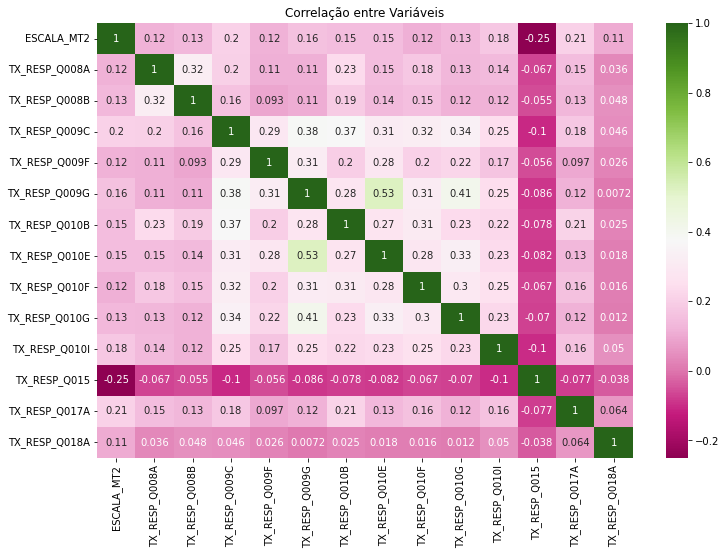

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df_home.corr(method="spearman"), annot=True, cmap="PiYG")
plt.title("Correlação entre Variáveis")
plt.show()

# Variáveis

8a - Se sua rua é pavimentada.

8b - Se tem água tratada.

9c - Quantos computadores ou notebooks existem na sua casa.

9f - Quantos banheiros existem na sua casa.

9g - Quantos carros existem na sua casa.

10b - Se tem Wifi em casa

10e - Se tem garagem em casa.

10f - Se tem forno microondas em casa.
10g

10i - Se tem geladeira ou freezer em casa.

15 - numéro de reprovação.

17a - tempo de lazer fora da escola.

18a - Frequencia ler notícias.

C:\Users\wfs4.NB555-WFS4\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


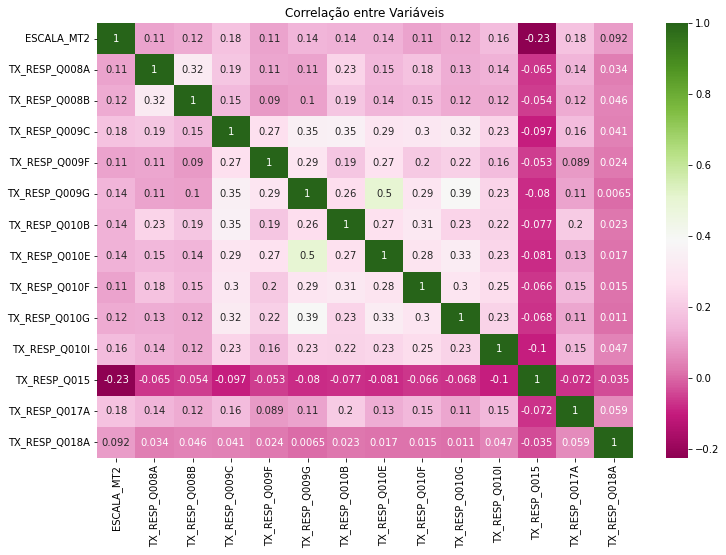

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df_home.corr(method="kendall"), annot=True, cmap="PiYG")
plt.title("Correlação entre Variáveis")
plt.show()

In [25]:
# Importar metrica
from sklearn.feature_selection import chi2

# Split dataset
X = df_home.drop(['ESCALA_MT2'], axis=1)
y = df_home.ESCALA_MT2

# Calculando Chi-Squared
chi_scores = chi2(X,y)

# Colocando label nos resultados para posterior plot
scores = pd.Series(chi_scores[0], index=X.columns)
pvalues = pd.Series(chi_scores[1], index=X.columns)

# Results
pd.DataFrame({'Chi2':scores, 'p-Value':pvalues})

,Chi2,p-Value
TX_RESP_Q008A,2788.728745,0.0
TX_RESP_Q008B,2886.788938,0.0
TX_RESP_Q009C,30436.725221,0.0
TX_RESP_Q009F,4397.104265,0.0
TX_RESP_Q009G,15608.004585,0.0
TX_RESP_Q010B,4390.698265,0.0
TX_RESP_Q010E,7651.193301,0.0
TX_RESP_Q010F,4419.134848,0.0
TX_RESP_Q010G,10542.187271,0.0
TX_RESP_Q010I,6429.905999,0.0


In [32]:
# Implementando metodos

# Split dataset in features and target variable

X = df_home.iloc[:, 1:].values # Features
y = df_home.iloc[:, 0].values # Target variable    


In [33]:
######################################
# Importando as blibiotecas
######################################
 
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

# Separar dados em Treino e Teste
 
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 1/5, random_state = 0)
 
# Treinando o modelo
 
classifier = LogisticRegression(multi_class='multinomial', max_iter = 300)
classifier.fit(X_train, y_train)

# Previsao
 
y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)

y_pred_prob = y_pred_prob[:,0]

y_result_prob = np.concatenate((y_pred.reshape(len(y_pred),1), y_pred_prob.reshape(len(y_pred_prob),1)),1)

# Matrix de confusao

cm = confusion_matrix(y_test, y_pred)
print(cm)

y_result = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

print(accuracy_score(y_test, y_pred))

[[  148  5327  8925   178     0]
 [  145 10117 33350   637     0]
 [   64  7451 60126  2308     0]
 [    9  1691 34168  2518     0]
 [    2   185  6137   810     0]]
0.4183056409785652


In [34]:
# Implementando metodos

catOrdinais = ['ESCALA_MT2','TX_RESP_Q008A','TX_RESP_Q008B','TX_RESP_Q009C',
                    'TX_RESP_Q009G','TX_RESP_Q010B','TX_RESP_Q010E',
                      'TX_RESP_Q010G', 'TX_RESP_Q010I', 'TX_RESP_Q015','TX_RESP_Q017A']
df_home = df_home[catOrdinais]

X = df_home.iloc[:, 1:] # Features
y = df_home.iloc[:, 0] # Target variable    


# Armazenando os nomes das features e das classes em listas
df_target_names  = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

df_features_names = X.columns.to_list()

print(df_features_names)

['TX_RESP_Q008A', 'TX_RESP_Q008B', 'TX_RESP_Q009C', 'TX_RESP_Q009G', 'TX_RESP_Q010B', 'TX_RESP_Q010E', 'TX_RESP_Q010G', 'TX_RESP_Q010I', 'TX_RESP_Q015', 'TX_RESP_Q017A']


In [35]:
df_home.head()

,ESCALA_MT2,TX_RESP_Q008A,TX_RESP_Q008B,TX_RESP_Q009C,TX_RESP_Q009G,TX_RESP_Q010B,TX_RESP_Q010E,TX_RESP_Q010G,TX_RESP_Q010I,TX_RESP_Q015,TX_RESP_Q017A
0,1,0,0,0,1,1,1,1,1,0,3
1,2,0,0,1,1,1,1,0,1,0,2
2,1,0,0,0,0,1,0,0,1,2,3
3,2,0,0,0,1,1,0,0,1,0,3
4,2,0,0,1,1,1,0,0,1,1,1


In [36]:
from scipy import stats
from sklearn import model_selection
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, precision_score
from sklearn.model_selection import train_test_split

seed = 1275


X_tree = X.to_numpy()
y_tree = y.to_numpy()


# Divisao da base de dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.2, stratify=y_tree, random_state=seed)

# Instanciando o modelo
decisionTree = DecisionTreeClassifier(random_state=seed)

# K-fold estratificado com k = 10
cv = model_selection.StratifiedKFold(n_splits=10)

# definição dos parâmetros para a árvore de decisão
param_distributions = { 'criterion': ['gini', 'entropy'],
                        'min_samples_split': range(1, 51),
                        'max_depth': [2,3],
                        'min_samples_leaf': [3,4,5,6,7,8,9,10]
                      }

# define random search for decision tree
rnd_search_tree = RandomizedSearchCV( estimator=decisionTree, 
                                      param_distributions = param_distributions, 
                                      n_iter=25, scoring='accuracy', 
                                      n_jobs=-1, cv=cv, random_state=seed
                                    )

# execute search
result_tree = rnd_search_tree.fit(X_train, y_train)



In [46]:
cv_models_results = {} # Armazena os scores da validação cruzada de cada modelo avaliado
# summarize result for decision tree
print('=========Random Search Results for TREE==========')
print('Best Score: %s' % result_tree.best_score_)
print('Best Hyperparameters: %s' % result_tree.best_params_)

# Instanciando e avaliando o modelo
decisionTree = DecisionTreeClassifier(**result_tree.best_params_)

model = decisionTree.fit(X_train, y_train)
y_predicted = decisionTree.predict(X_test)

print('\nDesempenho médio da Árvore de Decisão:')

cv_results = model_selection.cross_val_score(decisionTree, X_train, y_train, cv=cv, scoring='accuracy')
cv_models_results['decisionTree'] = cv_results

name = 'Arvore de Decisão'
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

print("\nAcuracia Árvore de Decisão: Treinamento",  decisionTree.score(X_train, y_train)," Teste", decisionTree.score(X_test, y_test))
print("\nClasification report:\n", classification_report(y_test, y_predicted))
print("Confusion matrix:\n", confusion_matrix(y_test, y_predicted))

=========Random Search Results for TREE==========
Best Score: 0.4190547360638533
Best Hyperparameters: {'min_samples_split': 31, 'min_samples_leaf': 8, 'max_depth': 8, 'criterion': 'gini'}

Desempenho médio da Árvore de Decisão:
Arvore de Decisão: 0.419055 (0.001041)

Acuracia Árvore de Decisão: Treinamento 0.4205636699795319  Teste 0.4180531968605132


C:\Users\wfs4.NB555-WFS4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wfs4.NB555-WFS4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wfs4.NB555-WFS4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Clasification report:
               precision    recall  f1-score   support

           0       0.37      0.02      0.04     14607
           1       0.41      0.24      0.30     44324
           2       0.42      0.86      0.57     70024
           3       0.38      0.05      0.09     38310
           4       0.00      0.00      0.00      7031

    accuracy                           0.42    174296
   macro avg       0.32      0.23      0.20    174296
weighted avg       0.39      0.42      0.33    174296

Confusion matrix:
 [[  269  5607  8593   138     0]
 [  288 10604 32920   512     0]
 [  144  7988 60120  1772     0]
 [   24  1738 34676  1872     0]
 [    1   181  6209   640     0]]


In [47]:
text_representation = tree.export_text(decisionTree, feature_names=df_features_names)
print(text_representation)

|--- TX_RESP_Q015 <= 0.50
|   |--- TX_RESP_Q017A <= 1.50
|   |   |--- TX_RESP_Q017A <= 0.50
|   |   |   |--- TX_RESP_Q010I <= 0.50
|   |   |   |   |--- TX_RESP_Q008A <= 0.50
|   |   |   |   |   |--- TX_RESP_Q009G <= 1.50
|   |   |   |   |   |   |--- TX_RESP_Q010E <= 0.50
|   |   |   |   |   |   |   |--- TX_RESP_Q009C <= 2.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- TX_RESP_Q009C >  2.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- TX_RESP_Q010E >  0.50
|   |   |   |   |   |   |   |--- TX_RESP_Q009C <= 1.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- TX_RESP_Q009C >  1.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- TX_RESP_Q009G >  1.50
|   |   |   |   |   |   |--- TX_RESP_Q010G <= 0.50
|   |   |   |   |   |   |   |--- TX_RESP_Q009G <= 2.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- TX_RESP_Q009G >  2.50
|   |   |   |   |  

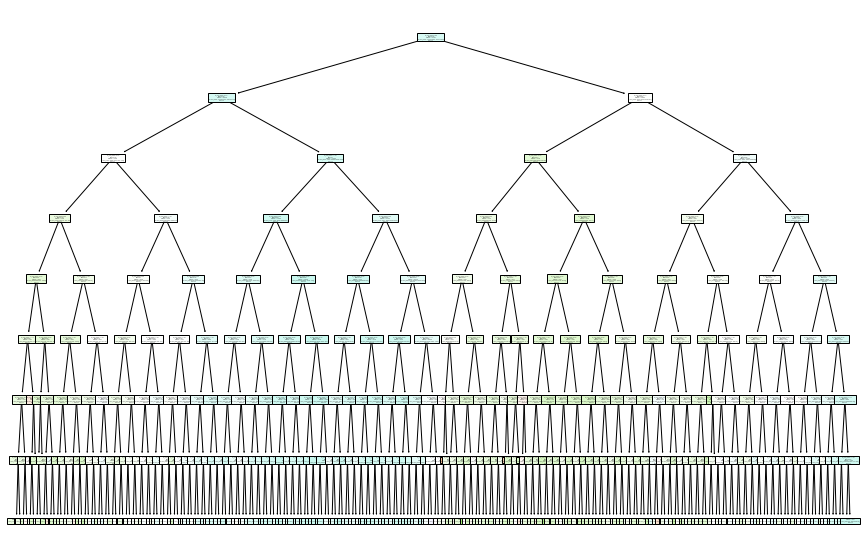

In [48]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(decisionTree, 
                   feature_names=df_features_names,  
                   class_names=df_target_names,
                   filled=True)

In [ ]:
0X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED, stratify=y)
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.20, random_state = SEED, stratify=y_train)

# Padronizando separadamente as bases


#X_valid = preprocessing.minmax_scale(X_valid)

# Instanciando e treinando modelo

clf = DecisionTreeClassifier(criterion="entropy", random_state=SEED)
model = clf.fit(X_train, y_train)

# Avaliando o modelo

print("Score de treino:", precision_score(y_test, clf.predict(X_test), average="micro"))

print(classification_report(y_test, clf.predict(X_test), df_target_names))

In [ ]:
text_representation = tree.export_text(decisionTree, feature_names=df_features_names)
print(text_representation)

In [ ]:
print("Score de treino:", precision_score(y_test, clf.predict(X_test), average="micro"))

print(classification_report(y_test, clf.predict(X_test), target_names=df_target_names))

In [ ]:
text_representation = tree.export_text(clf, feature_names=iris['feature_names'])
print(text_representation)

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=catOrdinais
                 
                   ,
                   filled=True)


In [ ]:
df["ESCALA_MT"].shape

In [ ]:
df_home["ESCALA_MT"].shape

# Análises por regiões
Região 1 = Norte

Região 2 = Nordeste
 
Região 3 = Sudeste

Região 4 = Sul

Região 5 = Centro-oeste


In [ ]:
df_região_1 = df[df['ID_REGIAO']==1].iloc[:, 6:]

# Transformando dados categoricos
label = preprocessing.LabelEncoder()
data_encoded1 = pd.DataFrame() 

for i in df_aux.columns:
    data_encoded1[i]=label.fit_transform(df_região_1[i])
data_encoded1.head()

In [ ]:
data_encoded1.corr(method='spearman')

In [ ]:
df_região_2 = df[df['ID_REGIAO']==2].iloc[:, 6:]

# Transformando dados categoricos
data_encoded2 = pd.DataFrame() 

for i in df_aux.columns:
    data_encoded2[i]=label.fit_transform(df_região_2[i])
data_encoded2.head()

In [ ]:
data_encoded2.corr(method='spearman')

In [ ]:
df_região_3 = df[df['ID_REGIAO']==3].iloc[:, 6:]

# Transformando dados categoricos
data_encoded3 = pd.DataFrame() 

for i in df_aux.columns:
    data_encoded3[i]=label.fit_transform(df_região_3[i])
data_encoded3.head()

In [ ]:
data_encoded3.corr(method='spearman')

In [ ]:
df_região_4 = df[df['ID_REGIAO']==4].iloc[:, 6:]

# Transformando dados categoricos
data_encoded4 = pd.DataFrame() 

for i in df_aux.columns:
    data_encoded4[i]=label.fit_transform(df_região_4[i])
data_encoded4.head()

In [ ]:
data_encoded4.corr(method='spearman')

In [ ]:
df_região_5 = df[df['ID_REGIAO']==5].iloc[:, 6:]

# Transformando dados categoricos
data_encoded5 = pd.DataFrame() 

for i in df_aux.columns:
    data_encoded5[i]=label.fit_transform(df_região_5[i])
data_encoded5.head()

In [ ]:
data_encoded5.corr(method='spearman')